Step 1: Import Libraries


In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Step 2: Load the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

dataset_path = '/content/drive/My Drive/DATASETS (IMAGE)/Bharatnatyam Dataset/new_Dataset'



In [ ]:
# Listing the contents of Google Drive
import os

drive_base_path = '/content/drive/My Drive/DATASETS (IMAGE)/Bharatnatyam Dataset/new_Dataset'
print("Files and folders in My Drive:")
print(os.listdir(drive_base_path))


Files and folders in My Drive:
['Samapadam Augmented', 'Swastika Augmented', 'Prenkhana Augmented', 'Nataraj Augmented', 'Nagabandham Augmented', 'Muzhumandi Augmented', 'Garuda Augmented', 'Bramha Augmented', 'Ardhamandalam Augmented']


In [ ]:

# Getting the list of classes (folders)
class_names = os.listdir(dataset_path)
print("Classes found:", class_names)

# Creating a dictionary to map class names to labels
class_labels = {class_name: index for index, class_name in enumerate(class_names)}
print("Class labels:", class_labels)


Classes found: ['Samapadam Augmented', 'Swastika Augmented', 'Prenkhana Augmented', 'Nataraj Augmented', 'Nagabandham Augmented', 'Muzhumandi Augmented', 'Garuda Augmented', 'Bramha Augmented', 'Ardhamandalam Augmented']
Class labels: {'Samapadam Augmented': 0, 'Swastika Augmented': 1, 'Prenkhana Augmented': 2, 'Nataraj Augmented': 3, 'Nagabandham Augmented': 4, 'Muzhumandi Augmented': 5, 'Garuda Augmented': 6, 'Bramha Augmented': 7, 'Ardhamandalam Augmented': 8}


Step 3: Preprocess Images


In [ ]:
# Define image size
image_size = (128, 128)  # You can adjust this based on your model's requirements

X = []
y = []

# Load images and labels
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)  # Load the image
        img = cv2.resize(img, image_size)  # Resize the image
        img = img / 255.0  # Normalize pixel values
        X.append(img)
        y.append(class_labels[class_name])  # Get the label for the class

X = np.array(X)
y = np.array(y)

print("Loaded images shape:", X.shape)
print("Labels shape:", y.shape)


Loaded images shape: (1731, 128, 128, 3)
Labels shape: (1731,)


Printing the Images

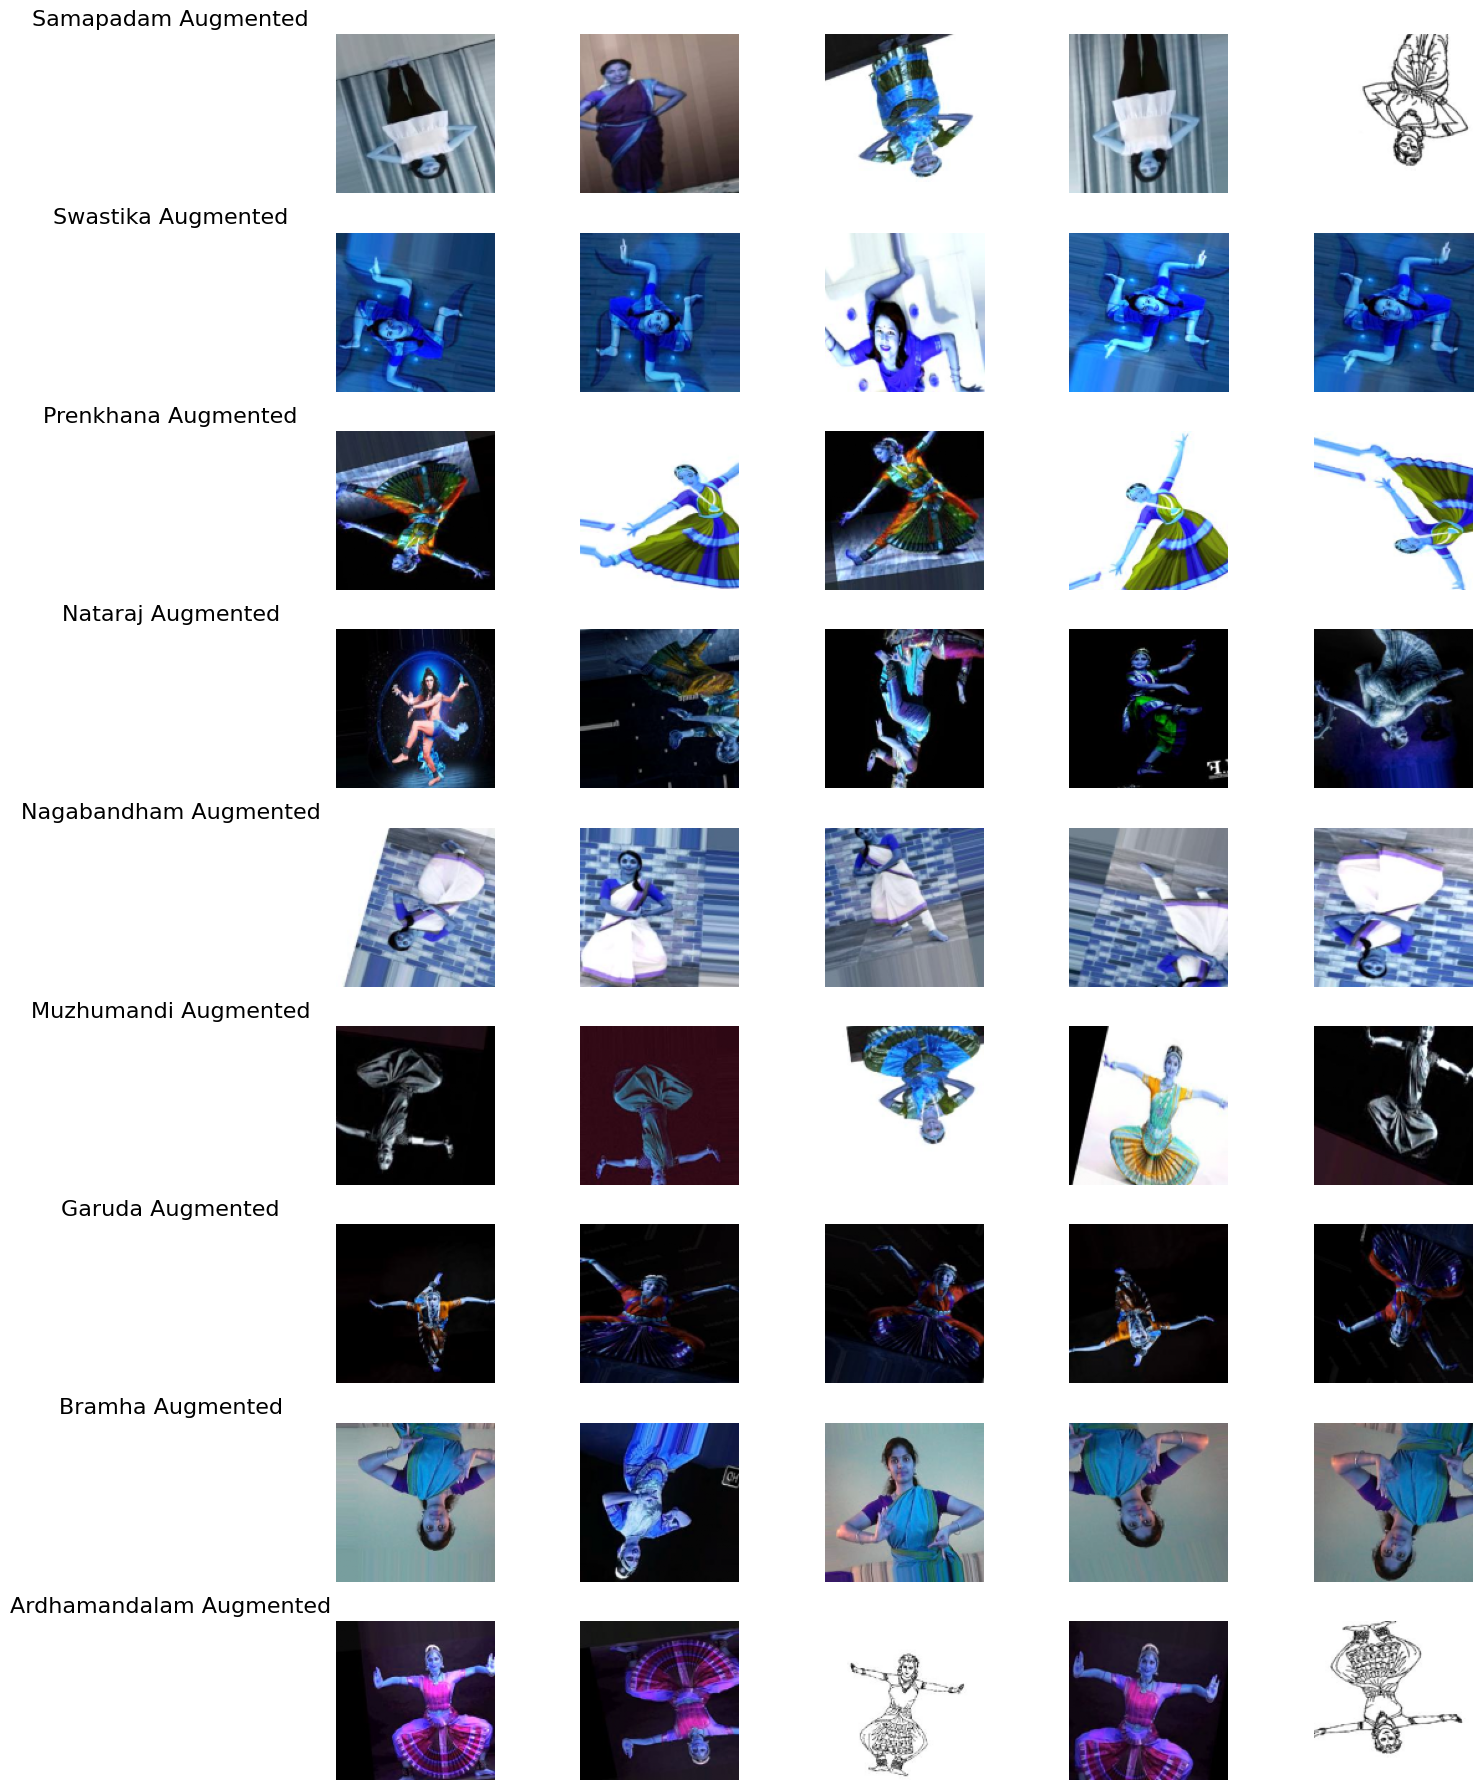

In [ ]:
import matplotlib.pyplot as plt
import random

# Setting the number of images to display per class
num_images_to_display = 5

# Creating a figure to display images
plt.figure(figsize=(15, len(class_names) * 2))  # Adjust height based on number of classes

# Iterating through each class
for class_index, class_name in enumerate(class_names):

    # Finding all image indices for the current class
    class_indices = np.where(y == class_index)[0]

    # Randomly select a few image indices
    selected_indices = random.sample(list(class_indices), min(num_images_to_display, len(class_indices)))

    # Display the class label
    plt.subplot(len(class_names), num_images_to_display + 1, class_index * (num_images_to_display + 1) + 1)  # Position for the class label
    plt.title(class_name, fontsize=16)  # Display the class label
    plt.axis('off')  # Turn off axis labels

    for i, img_index in enumerate(selected_indices):
        plt.subplot(len(class_names), num_images_to_display + 1, class_index * (num_images_to_display + 1) + (i + 2))  # Position for images
        plt.imshow(X[img_index])
        plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()




Step 4: Split the Dataset


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1211, 128, 128, 3)
Validation set shape: (260, 128, 128, 3)
Test set shape: (260, 128, 128, 3)


Step 5: Build the CNN Model


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Step 6: Train the Model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Using data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20)

# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=25)  # Adjust epochs as needed


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.3702 - loss: 1.8236 - val_accuracy: 0.5615 - val_loss: 1.0467
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.5772 - loss: 1.1513 - val_accuracy: 0.6808 - val_loss: 0.7779
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.7173 - loss: 0.7394 - val_accuracy: 0.8808 - val_loss: 0.3864
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7715 - loss: 0.5616 - val_accuracy: 0.7962 - val_loss: 0.4801
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8129 - loss: 0.4955 - val_accuracy: 0.8769 - val_loss: 0.2797
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.8797 - loss: 0.3282 - val_accuracy: 0.8577 - val_loss: 0.3318
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8587 - loss: 0.3686 - val_accuracy: 0.9423 - val_loss: 0.1523
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.8902 - loss: 0.2923 - val_accuracy: 0.9346 - val_l

Step 7: Evaluate the Model


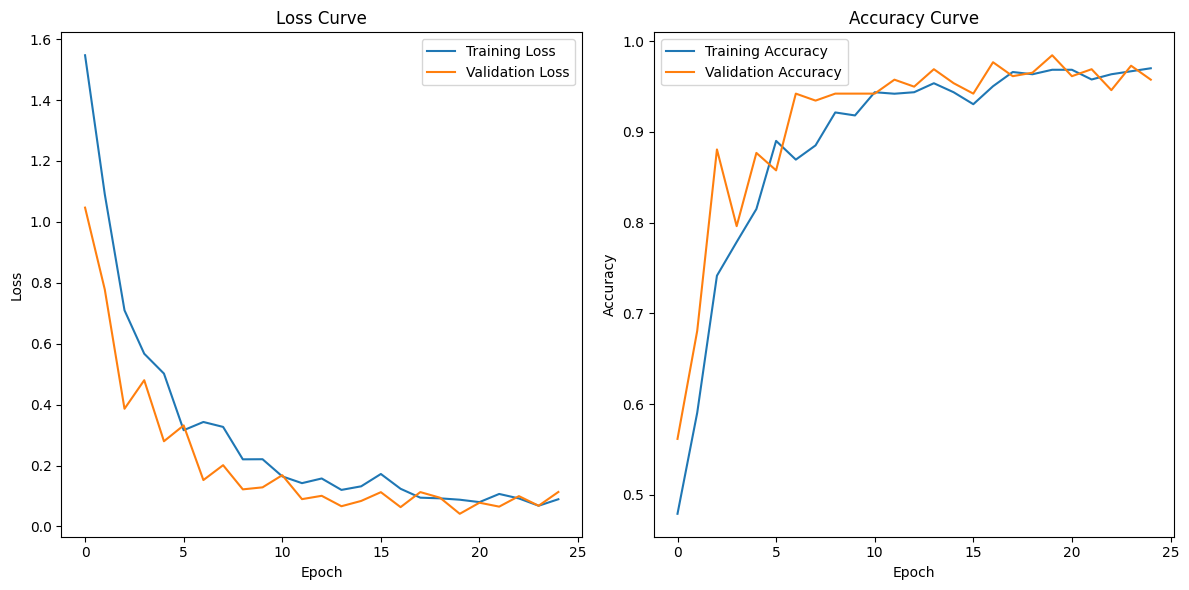

In [ ]:
# Optional: Plot loss history
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Predicting the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Generating the classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Printing the classification report
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
                         precision    recall  f1-score   support

    Samapadam Augmented       0.95      0.92      0.93        38
     Swastika Augmented       1.00      0.94      0.97        17
    Prenkhana Augmented       1.00      1.00      1.00        16
      Nataraj Augmented       1.00      0.93      0.97        61
  Nagabandham Augmented       1.00      0.95      0.97        38
   Muzhumandi Augmented       0.94      1.00      0.97        47
       Garuda Augmented       0.88      1.00      0.93        14
       Bramha Augmented       1.00      0.93      0.96        14
Ardhamandalam Augmented       0.74      0.93      0.82        15

               accuracy                           0.95       260
              macro avg       0.94      0.96      0.95       260
           weighted avg       0.96      0.95      0.96       260

